In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
import scipy . linalg as lng # linear algebra from scipy library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # call it with squared=False to get RMSE
from sklearn.linear_model import LinearRegression

# Load data

In [21]:
df = pd.read_csv("case1Data.txt", sep=', ')
df.columns = [c.replace(' ', '') for c in df.columns]
categorical = [c for c in df.columns if c.startswith("C")]
df[categorical].astype(pd.CategoricalDtype(categories=set(df[categorical].stack())))

df_new = pd.read_csv("case1Data_Xnew.txt", sep=', ') # for competition, without y
df_new.columns = [c.replace(' ', '') for c in df_new.columns]

df.head()

/home/annareisz/miniconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,C_1,C_2,C_3,C_4,C_5
0,-6.158895,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,3.692902,12.826477,-6.889479,3.443535,5.400120,I,NaN,H,J,K
1,-22.200026,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,...,7.270303,10.039281,-7.678936,-0.189822,0.717526,H,NaN,H,I,I
2,-19.357551,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,...,5.889789,14.186614,-9.527944,0.400832,-2.458897,NaN,I,K,J,G
3,28.763803,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,...,7.024105,8.871258,-7.514400,-3.448892,-2.612379,K,H,I,I,NaN
4,43.779898,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,...,8.186575,10.532577,-7.509476,NaN,0.754905,H,H,K,J,J


# Exploratory Data Analysis

In [3]:
df.describe()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95
count,100.000000,91.000000,88.000000,86.000000,92.000000,88.000000,83.000000,84.000000,88.000000,80.000000,...,90.000000,89.000000,86.000000,83.000000,83.000000,86.000000,86.000000,88.000000,85.000000,86.000000
mean,12.845335,-7.961324,5.360252,12.591927,-16.972991,-14.430159,23.436658,2.922743,5.453281,3.142095,...,-2.961682,2.701978,3.797721,-31.789030,-4.929024,7.817448,12.459723,-7.163831,0.738517,0.542156
std,41.508545,3.077814,2.806160,2.742239,2.828771,3.017754,2.798288,3.046128,2.544477,3.537029,...,3.423931,3.087378,2.764272,3.101649,2.916408,2.501191,2.652586,2.801286,3.228583,2.850668
min,-116.367752,-15.662503,-1.074901,3.613403,-24.096899,-21.311724,16.342276,-4.222549,-1.356242,-8.062094,...,-11.206825,-3.511208,-2.396112,-39.440232,-11.779858,-0.300405,6.439124,-13.845458,-5.705962,-9.341763
25%,-11.477180,-10.177249,3.596601,11.252738,-18.771881,-16.587466,21.336060,1.003437,3.797239,0.534399,...,-5.282058,0.060900,2.023698,-33.774391,-6.684811,6.471662,10.625041,-8.915151,-1.705282,-1.748174
50%,12.937980,-7.681623,5.275706,12.681014,-17.189957,-14.427376,23.680197,3.164610,5.484576,3.520660,...,-2.937831,3.050322,3.930975,-31.954316,-5.032407,7.908044,12.593310,-7.191021,1.062633,0.839569
75%,36.079936,-5.749885,7.314468,14.404678,-14.810054,-12.327134,25.206606,4.796548,7.226259,5.283436,...,-0.667052,4.491806,5.628363,-29.520557,-2.852210,9.666074,14.299980,-5.026088,3.535945,2.246021
max,130.164249,-0.338859,11.555731,20.894608,-10.143062,-7.018273,29.143188,12.182279,11.944142,10.718729,...,4.953316,10.668641,10.390760,-24.734686,1.532274,13.406027,20.018462,-1.268347,6.254642,7.585587


## Missing values

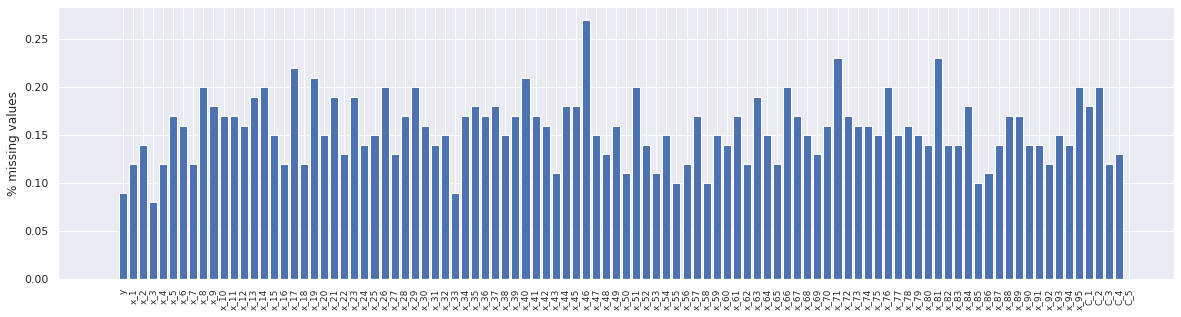

In [4]:
plt.figure(figsize=(20, 5))
plt.bar(df.columns, df.isna().sum(axis=0)/100)
plt.ylabel("% missing values")
plt.xticks(np.arange(len(df.columns))+1, df.columns, rotation=90, fontsize=9)
plt.show()

## Correlation

/home/annareisz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


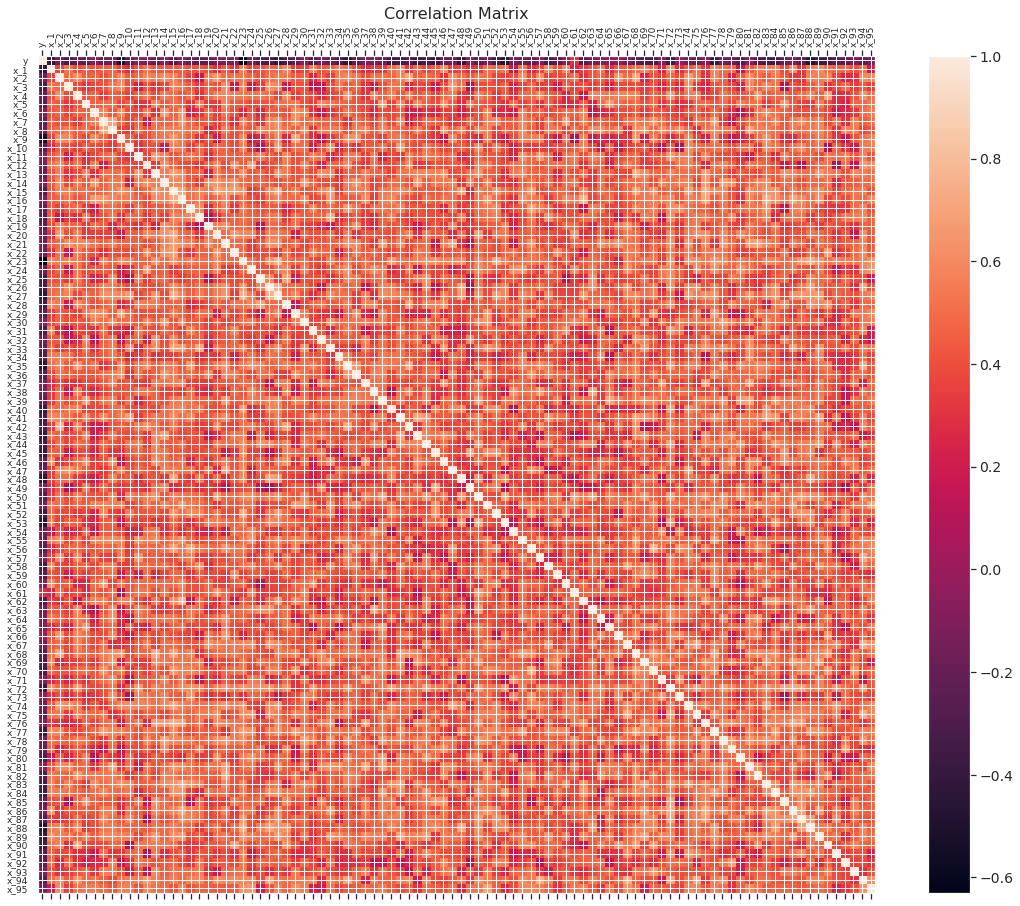

In [5]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Normality

In [10]:
#if pval is below 0.05 it's not gaussian
continuous_p = 96
non_normal = []
for i in range(1, continuous_p):
    col = f'x_{i}'
    test = shapiro(df[col].dropna()) # df_new is even less problematic. seems they generated the data with random.normal
    pvalue = test.pvalue
    if pvalue < 0.05:
        print(f"{col} is not normally distributed  with p-value {pvalue}")
        non_normal.append(col)

x_16 is not normally distributed  with p-value 0.04941681772470474
x_26 is not normally distributed  with p-value 0.01097308099269867
x_47 is not normally distributed  with p-value 0.04904714971780777
x_54 is not normally distributed  with p-value 0.045696306973695755
x_91 is not normally distributed  with p-value 0.035107966512441635
x_94 is not normally distributed  with p-value 0.00831662118434906


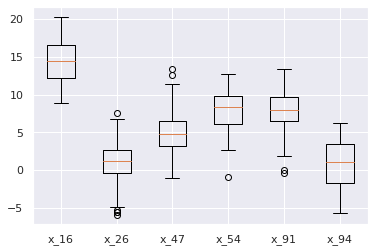

In [12]:
boxes = []
for c in non_normal:
    boxes.append(df[c].dropna())
plt.boxplot(boxes)
plt.xticks(np.arange(len(non_normal))+1, non_normal)
plt.show()

## Categorical variables

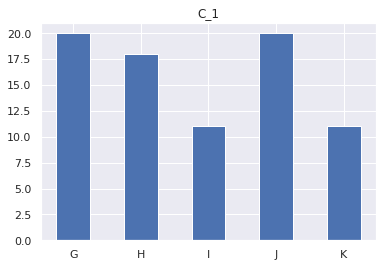

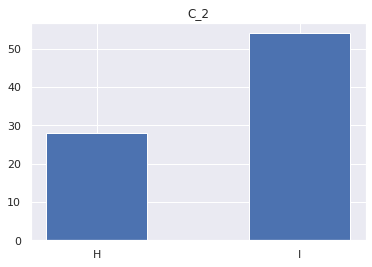

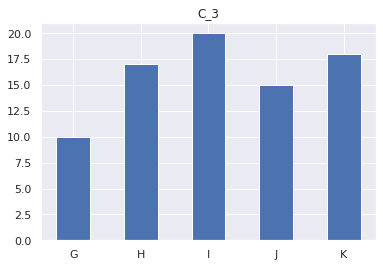

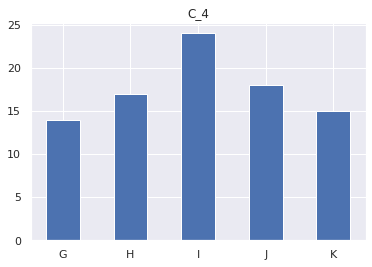

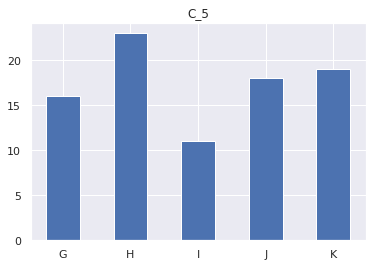

set()

In [85]:
for col in categorical:
    labels, counts = np.unique(df[col].dropna(), return_counts=True)
    plt.bar(labels, counts, width=0.5)
    plt.title(col)
    plt.show()
    
# thankfully, no new categories
set(df[categorical].stack()).difference(df_new[categorical].stack())

## Target

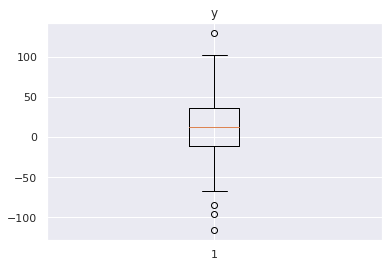

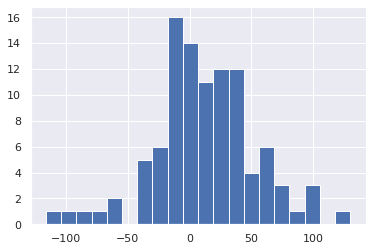

ShapiroResult(statistic=0.9826102256774902, pvalue=0.21116378903388977)

In [96]:
plt.boxplot(df['y'])
plt.title("y")
plt.show()

plt.hist(df['y'], bins=20)
plt.show()

shapiro(df['y'])

# Baseline model

## Preprocess

In [86]:
#I wonder if we could predict missing values from the existing ones
def replace_nan_with_mean(data):
    means = data.mean()
    for i in range(len(means)):
        data[data.columns[i]] = data[data.columns[i]].fillna(means[i])
        
# we could get dummies or we could understand the letters as ordinal variables ie. assign a numebr to them -let's ask the TAs
def get_X_with_dummies(df):
    dummy_vars = pd.get_dummies(df[categorical], prefix= categorical)
    df_with_dummies = pd.concat((df[[c for c in df.columns if c.startswith('x')]], dummy_vars), axis=1)
    return df_with_dummies

def preprocess(df):
    df_with_dummies = get_X_with_dummies(df)
    replace_nan_with_mean(df_new_with_dummies) # TODO: I don't like that it's inplace
    return df_new_with_dummies.values



In [87]:
X = preprocess(df)
X_new = preprocess(df_new)
y = df['y'].values 

scaler = StandardScaler()
scaler.fit(np.concatenate((X, X_new))) #using both X and X_new
X = scaler.transform(X)
X_new = scaler.transform(X_new)

In [90]:
## Fit OLS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

model0 = LinearRegression().fit(X_train, y_train)
y_pred = model0.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root mean square error for OLS is:", rmse)



Root mean square error for OLS is: 39.054842245943235
